In [1]:
import json
import seaborn as sns
from os.path import exists
import pandas as pd

In [2]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,12

In [3]:
MODELS = [
    "text-davinci-002",
    "text-curie-001",
    "text-babbage-001",
    "bigscience/bloom",
    "EleutherAI/gpt-j-6B",
    "gpt-neox-20b",
    "facebook/opt-13b",
    "facebook/opt-30b",
    "co:here",
    "jurassic1-jumbo",
    "ul2",
    "google/flan-t5-xxl"
]

prompts = [
    "1",
    "2",
    "3",
    "4",
    "5",
]

tasks = [
    "classification",
    "ner",
    "similarity",
    "summarisation",
    "qa"
]

n_shots = [0,1,3,5,10]

In [4]:
log_data = []
for task in tasks:
    score_label = "f1"
    if task in ["summarisation", "qa"]:
        score_label = "rougeL"
    for model in MODELS:
        for prompt in prompts:
            for n_shot in n_shots:
                prompt_name = prompt
                model_name = model.replace('/', '-')
                log_file = f"../llm_logs/{task}-{model_name}-{prompt_name}-{n_shot}.json"
                if exists(log_file):
                    with open(log_file) as f:
                        data = json.load(f)
                        log_data.append({
                            "model": model,
                            "prompt": prompt_name,
                            "n_shot": n_shot,
                            "task": task,
                            "score": data['metrics'][score_label],
                        })
            print("prompt", prompt)
        print("model", model)
    print("task", task)
                

prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model text-davinci-002
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model text-curie-001
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model text-babbage-001
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model bigscience/bloom
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model EleutherAI/gpt-j-6B
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model gpt-neox-20b
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model facebook/opt-13b
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model facebook/opt-30b
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model co:here
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model jurassic1-jumbo
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model ul2
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model google/flan-t5-xxl
task classification
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model text-davinci-002
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model text-curie-001
prompt 1
prompt 2
prompt 3
prompt 4
prompt 5
model tex

In [41]:
model_map = [
    ("text-davinci-002","GPT3-davinci"),
    ("text-curie-001","GPT3-curie"),
    ("text-babbage-001","GPT3-babbage"),
    ("bigscience/bloom","BLOOM"),
    ("EleutherAI/gpt-j-6B","GPT-J-6B"),
    ("gpt-neox-20b","GPT-NeoX-20B"),
    ("facebook/opt-13b","OPT-13B"),
    ("facebook/opt-30b","OPT-30B"),
    ("co:here","Co:here"),
    ("jurassic1-jumbo","Jurassic-1 Jumbo"),
    ("ul2","UL2"),
    ("google/flan-t5-xxl","Flan-T5-xxl")
]
for m in model_map:
    for l in log_data:
        if l['model'] == m[0]:
            l['model'] = m[1]
            

order = ["Jurassic-1 Jumbo", "GPT3-davinci", "BLOOM", "Co:here", "OPT-30B", 
         "GPT-NeoX-20B", "UL2", "OPT-13B", "GPT3-curie", "Flan-T5-xxl", "GPT3-babbage"]

In [42]:
df = pd.DataFrame(log_data)

In [43]:
import numpy as np

[Text(0, 0.5, 'mean score over all tasks')]

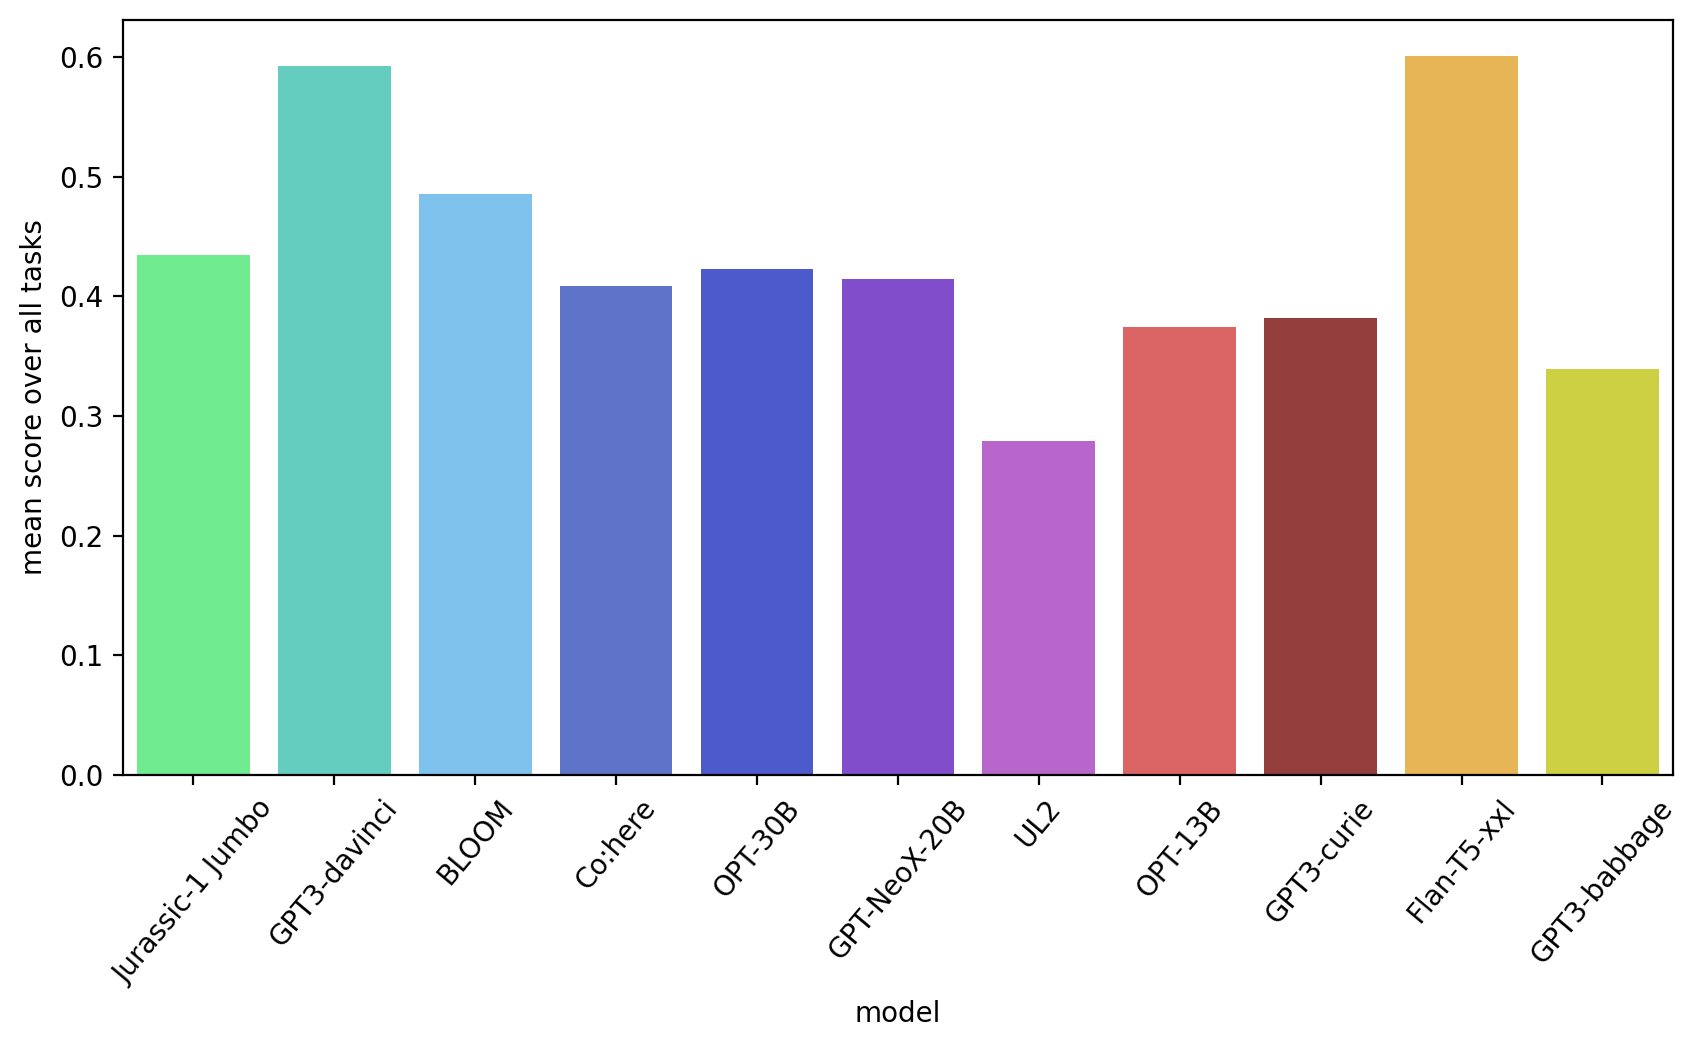

In [44]:

pallete = ["#5cff85", "#52dfcd", "#6dc6ff", "#4c6ada", "#3849e0", "#7f38e0",
           "#c254dd", "#ef5151", "#a22f2f", "#ffbd3e", "#e5e72c", "#94ea40"]
customPalette = sns.set_palette(sns.color_palette(pallete))

rcParams['figure.figsize'] = 10,5
rcParams['figure.dpi'] = 200

df2 = df.loc[df['prompt'].isin(["1","2","3","4","5"])]
#idx = df2.groupby(['model'])['score'].transform(np.mean) == df2['score']
df2['mean_score'] = df2.groupby(['model'])['score'].transform(np.mean)
ax = sns.barplot(data=df2, x="model", y="mean_score", palette=customPalette, order=order)
ax.tick_params(axis='x', rotation=50)
ax.set(ylabel="mean score over all tasks")

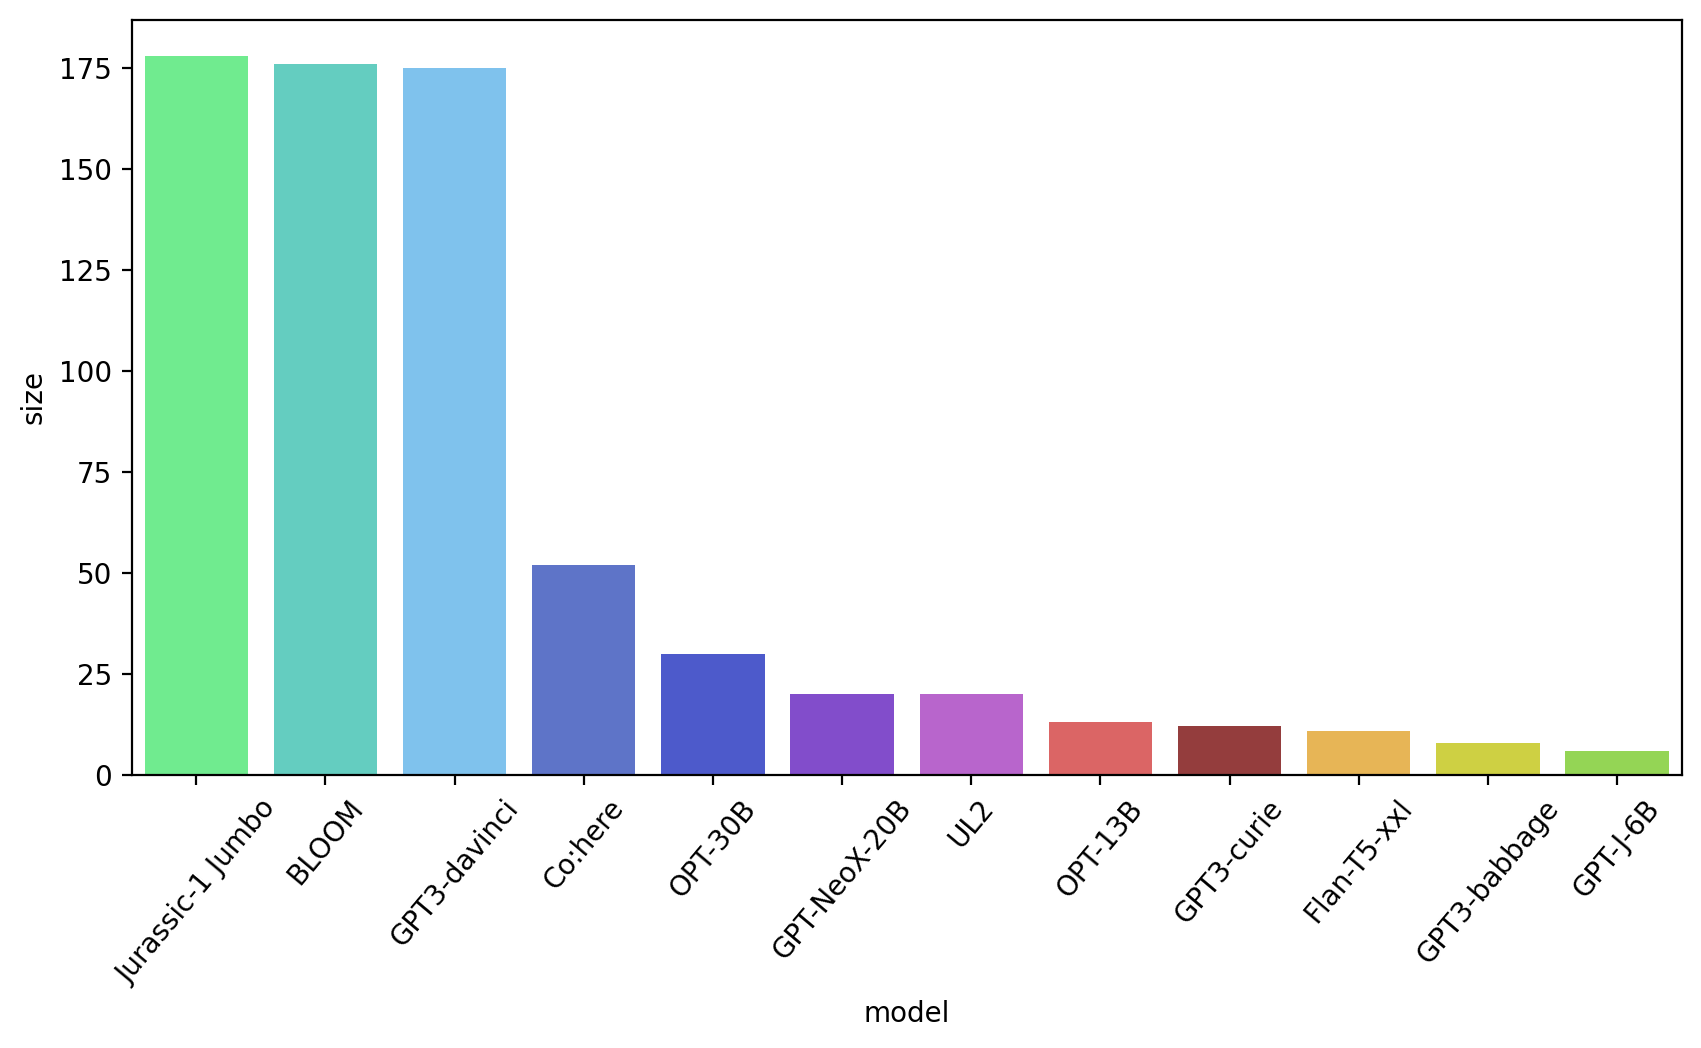

In [11]:

pallete = ["#5cff85", "#52dfcd", "#6dc6ff", "#4c6ada", "#3849e0", "#7f38e0",
           "#c254dd", "#ef5151", "#a22f2f", "#ffbd3e", "#e5e72c", "#94ea40"]
customPalette = sns.set_palette(sns.color_palette(pallete))

rcParams['figure.figsize'] = 10,5
rcParams['figure.dpi'] = 200


order = ["Jurassic-1 Jumbo", "BLOOM", "GPT3-davinci", "Co:here", "OPT-30B", 
         "GPT-NeoX-20B", "UL2", "OPT-13B", "GPT3-curie", "Flan-T5-xxl", "GPT3-babbage", "GPT-J-6B"]

model_sizes = [
    {"model": "Jurassic-1 Jumbo", "size": 178},
    {"model": "BLOOM", "size": 176},
    {"model": "GPT3-davinci", "size": 175},
    {"model": "Co:here", "size": 52},
    {"model": "OPT-30B", "size": 30},
    {"model": "GPT-NeoX-20B", "size": 20},
    {"model": "UL2", "size": 20},
    {"model": "OPT-13B", "size": 13},
    {"model": "GPT3-curie", "size": 12},
    {"model": "Flan-T5-xxl", "size": 11},
    {"model": "GPT3-babbage", "size": 8},
    {"model": "GPT-J-6B", "size": 6},
]

model_size_df = pd.DataFrame(model_sizes)

ax = sns.barplot(data=model_size_df, x="model", y="size", palette=customPalette, order=order)
ax.tick_params(axis='x', rotation=50)
#ax.set(ylabel="mean score over all tasks")

In [12]:
df2

,model,prompt,n_shot,task,score,mean_score
0,GPT3-davinci,1,1,classification,0.478217,0.592063
1,GPT3-davinci,1,3,classification,0.458027,0.592063
2,GPT3-davinci,1,5,classification,0.418227,0.592063
3,GPT3-davinci,1,10,classification,0.564580,0.592063
4,GPT3-davinci,2,1,classification,0.585452,0.592063
...,...,...,...,...,...,...
767,Flan-T5-xxl,3,3,qa,0.940650,0.600819
768,Flan-T5-xxl,4,1,qa,0.896011,0.600819
769,Flan-T5-xxl,4,3,qa,0.940026,0.600819
770,Flan-T5-xxl,5,1,qa,0.940553,0.600819


In [13]:

#df2['max'] = df2.groupby(['model', 'task'])['score'].transform(max)
#df2['min'] = df2.groupby(['model', 'task'])['score'].transform(min)
#df2['difference'] = df2['max']-df2['min']
#ax = sns.barplot(data=df2, x="model", y="difference", palette=customPalette)
#ax.tick_params(axis='x', rotation=30)

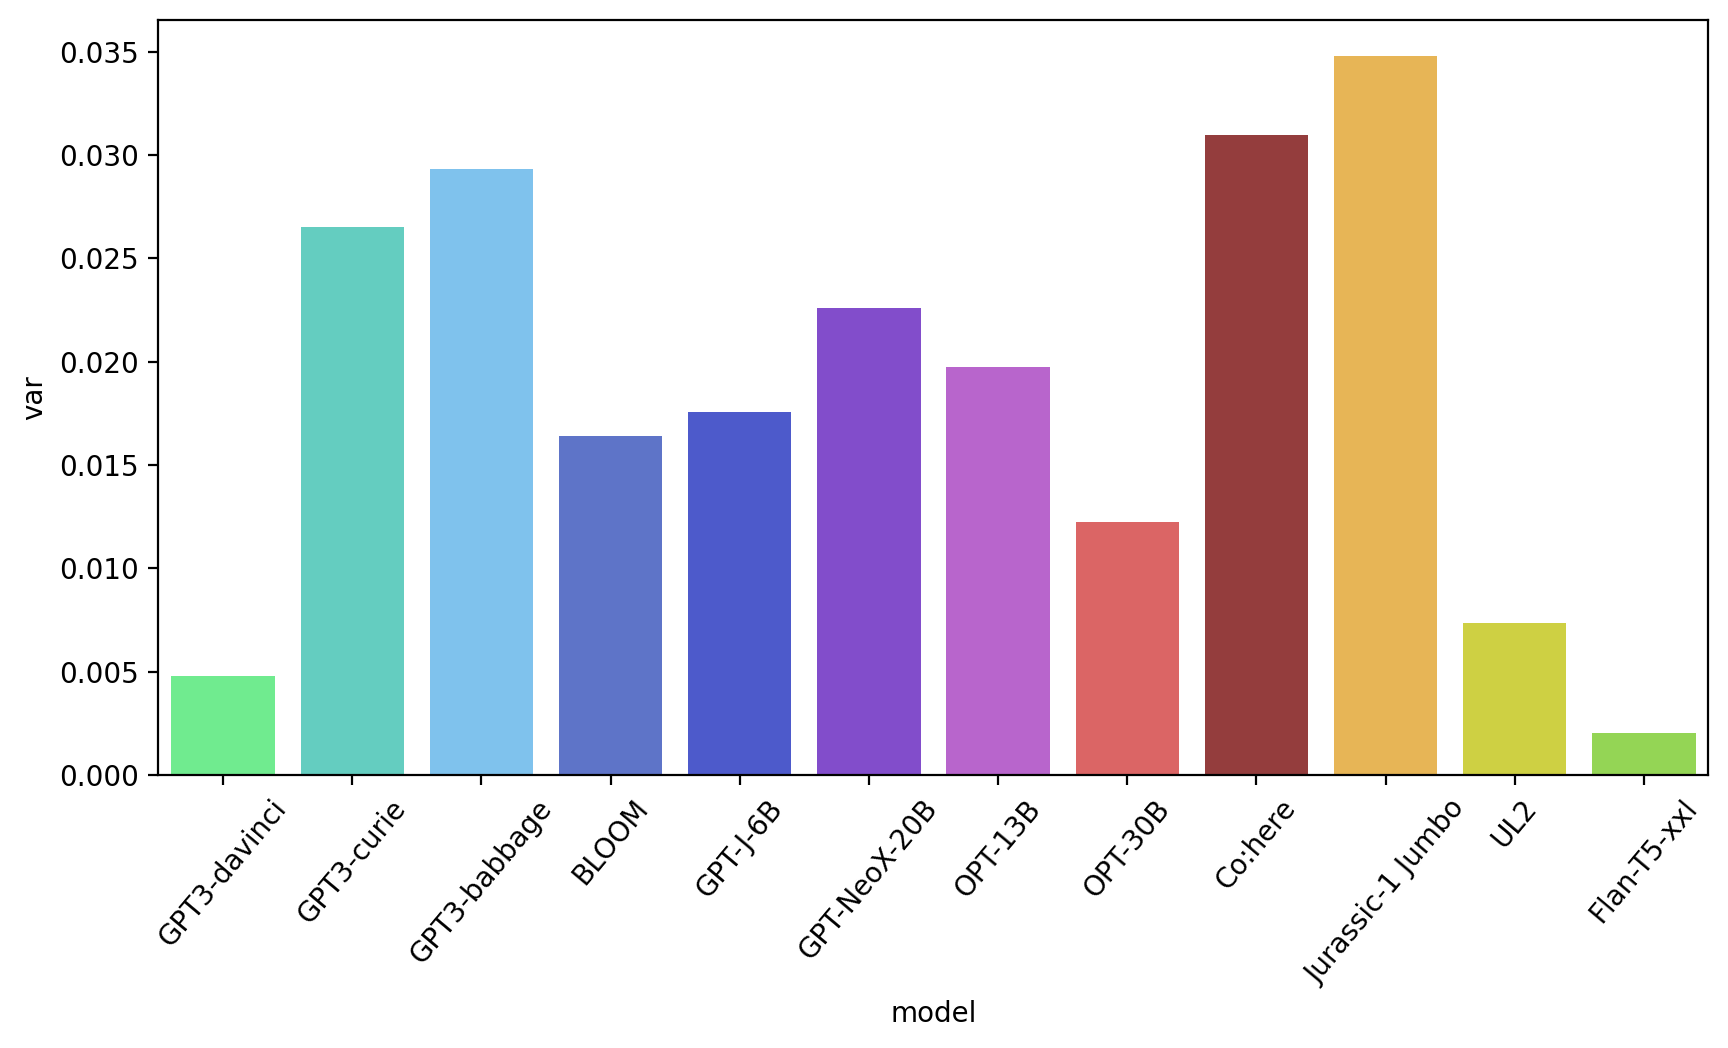

In [14]:
# prompt variability per task
df2['var'] = df2.groupby(['model', 'task'])['score'].transform(np.var)
#df2['var_mean'] = df2.groupby(['model'])['score'].transform(np.mean)
ax = sns.barplot(data=df2, x="model", y="var", palette=customPalette, errorbar=None)
ax.tick_params(axis='x', rotation=50)
#ax.set(title="Prompt variability per task")

[Text(0, 0.5, 'performance variability by n_shot')]

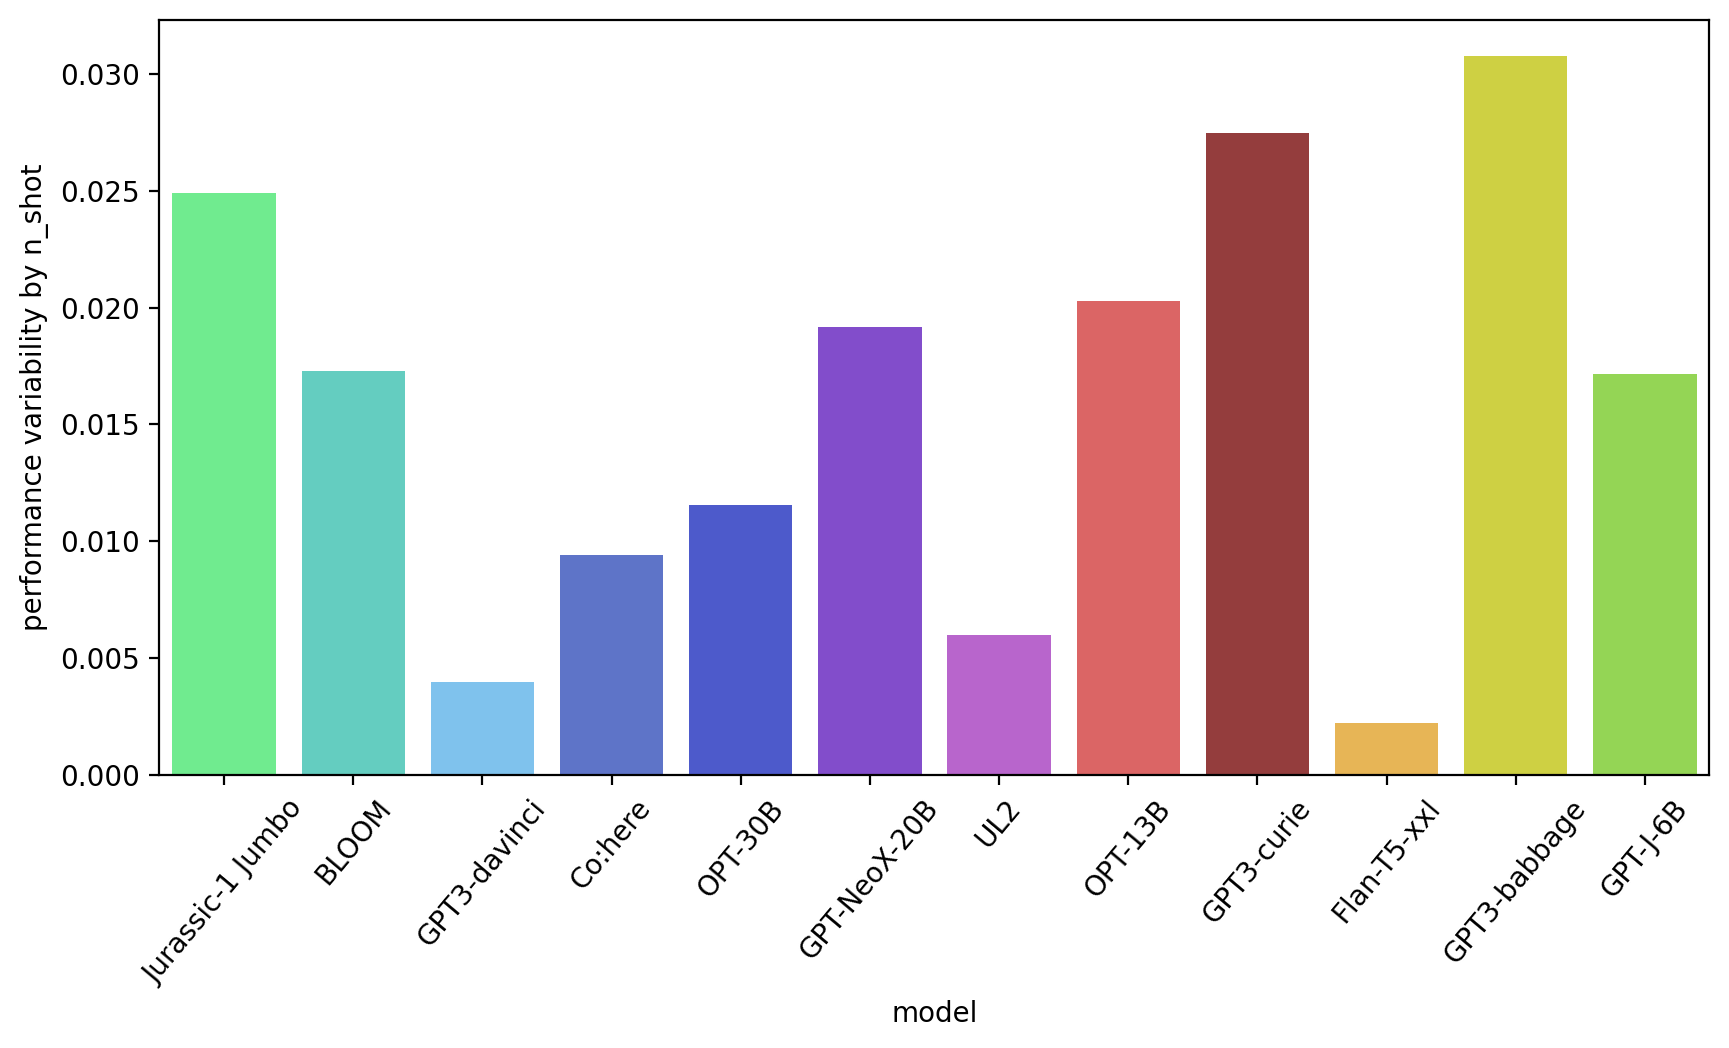

In [15]:
# N-shot instability

rcParams['figure.figsize'] = 10,5
rcParams['figure.dpi'] = 200
df2['var'] = df.groupby(['model', 'task', 'n_shot'])['score'].transform(np.var)
#df2['var_mean'] = df2.groupby(['model', 'task'])['var'].transform(np.mean)
ax = sns.barplot(data=df2, x="model", y="var", palette=customPalette, errorbar=None, order=order)
ax.tick_params(axis='x', rotation=50)
ax.set(ylabel="performance variability by n_shot")


In [ ]:
n_shot distribution

In [23]:

instability = [
    {"model": "GPT3-davinci", "model_size": 175, "score": 0.59},
    {"model": "Flan-T5-xxl", "model_size": 11, "score": 0.6}
]


df = pd.DataFrame(instability)
#df = df.set_index('model')

In [24]:
df.model_size

0    175
1     11
Name: model_size, dtype: int64

[Text(0.5, 0, 'mean score over all tasks')]

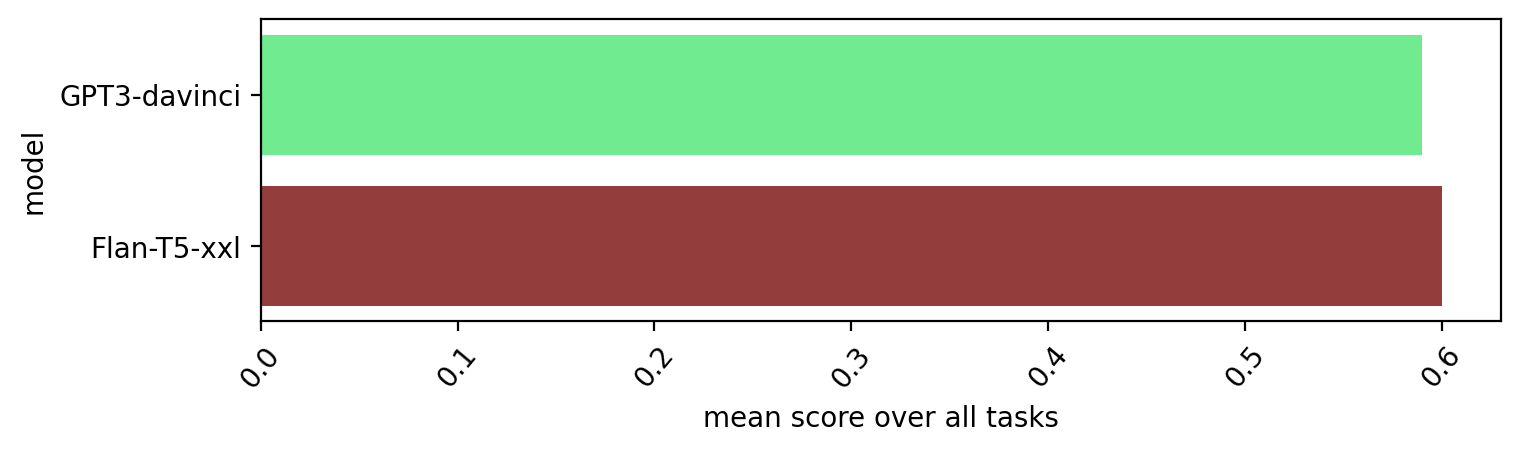

In [37]:

pallete = ["#5cff85", "#a22f2f", "#6dc6ff", "#4c6ada", "#3849e0", "#7f38e0",
           "#c254dd", "#ef5151", "#a22f2f", "#ffbd3e", "#e5e72c", "#94ea40"]
customPalette = sns.set_palette(sns.color_palette(pallete))

rcParams['figure.figsize'] = 8,2
rcParams['figure.dpi'] = 200
ax = sns.barplot(data=df, x="score", y="model", palette=customPalette, errorbar=None, orient = 'h')
ax.tick_params(axis='x', rotation=50)
ax.set(xlabel="mean score over all tasks")

[Text(0.5, 0, 'model size (B params)')]

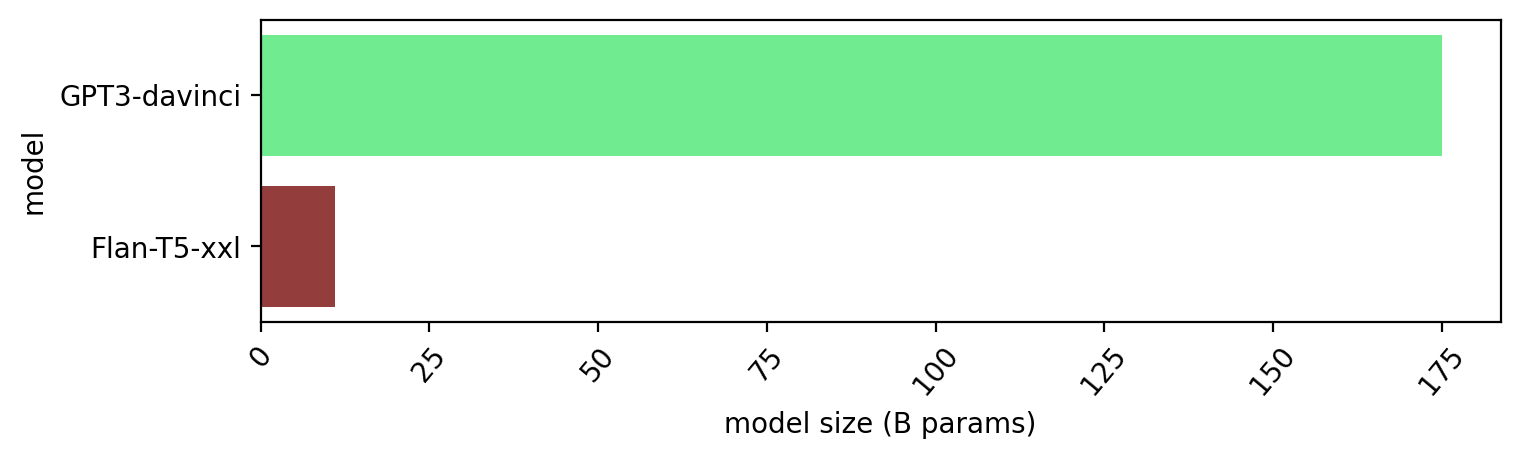

In [39]:

pallete = ["#5cff85", "#a22f2f", "#6dc6ff", "#4c6ada", "#3849e0", "#7f38e0",
           "#c254dd", "#ef5151", "#a22f2f", "#ffbd3e", "#e5e72c", "#94ea40"]
customPalette = sns.set_palette(sns.color_palette(pallete))

rcParams['figure.figsize'] = 8,2
rcParams['figure.dpi'] = 200
ax = sns.barplot(data=df, x="model_size", y="model", palette=customPalette, errorbar=None, orient = 'h')
ax.tick_params(axis='x', rotation=50)
ax.set(xlabel="model size (B params)")

(-1.0, 2.0)

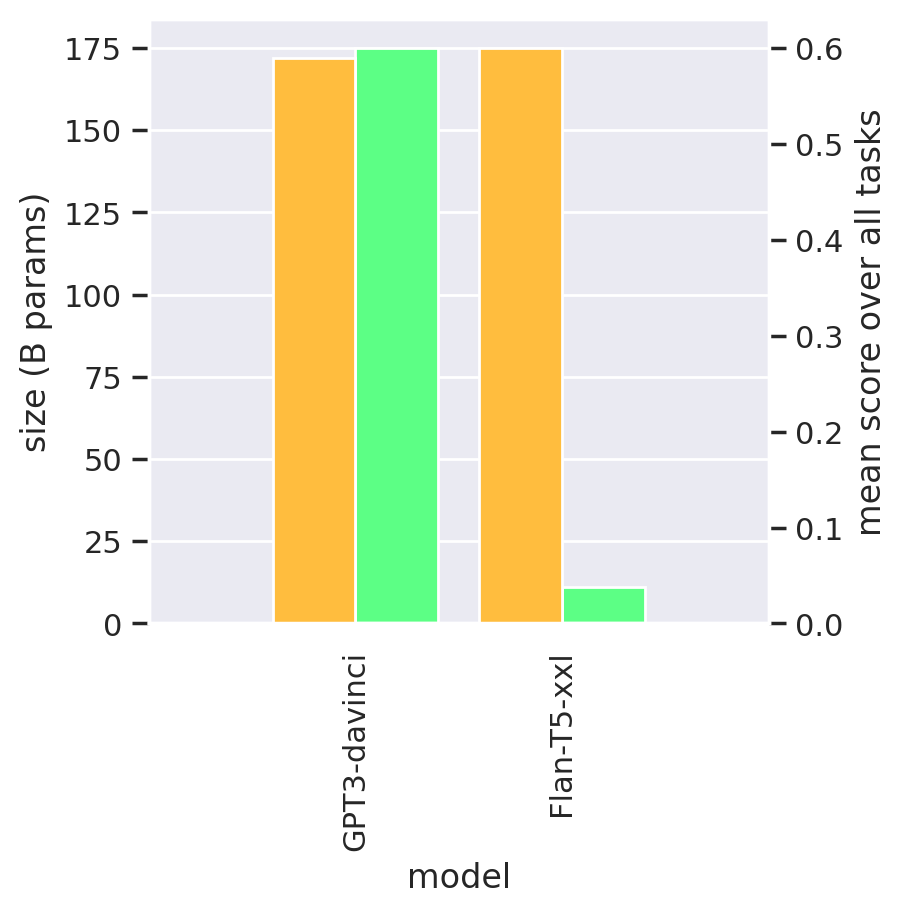

In [113]:
import matplotlib.pyplot as plt
sns.set()


fig = plt.figure(figsize=(4,4)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = 0.4

df.model_size.plot(kind='bar',color='#5cff85',ax=ax,width=width, position=0)
df.score.plot(kind='bar',color='#ffbd3e', ax=ax2,width = width,position=1)

ax.grid(None, axis='x')
ax2.grid(None)

ax.set_ylabel('size (B params)')
ax2.set_ylabel('mean score over all tasks')

ax.set_xlim(-1,2)